In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_archive_V1_101674.csv
/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_archive_M6_101673.csv
/kaggle/input/australian-bush-fire-satellite-data-nasa/Readme_nasa.txt
/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_nrt_M6_101673.csv
/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_nrt_V1_101674.csv


Problem Statement:
Bushfires in Australia cause severe damage to ecosystems, human lives, and property. The goal is to:

Use satellite data to detect fire events across regions

Analyze fire intensity, frequency, and regional patterns

Potentially build a model to predict fire risk zones



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
modis_archive = pd.read_csv("/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_archive_M6_101673.csv")
viirs_archive = pd.read_csv("/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_archive_V1_101674.csv")
modis_nrt = pd.read_csv("/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_nrt_M6_101673.csv")
viirs_nrt = pd.read_csv("/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_nrt_V1_101674.csv")

In [4]:
modis_archive.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-12.3168,142.0542,311.4,4.2,1.9,2019-09-01,14,Terra,MODIS,23,6.3,297.0,40.2,D,0
1,-12.3407,142.0894,310.2,4.2,1.9,2019-09-01,14,Terra,MODIS,18,6.3,296.9,33.5,D,0
2,-12.3266,142.0863,310.1,4.2,1.9,2019-09-01,14,Terra,MODIS,27,6.3,296.7,36.0,D,0
3,-12.6649,142.6015,310.4,3.8,1.8,2019-09-01,14,Terra,MODIS,35,6.3,298.1,28.2,D,0
4,-12.8706,142.7663,314.3,3.6,1.8,2019-09-01,14,Terra,MODIS,56,6.3,299.4,43.5,D,0


In [5]:
modis_archive['source'] = 'MODIS Archive'
viirs_archive['source'] = 'VIIRS Archive'
modis_nrt['source'] = 'MODIS NRT'
viirs_nrt['source'] = 'VIIRS NRT'

In [6]:
fire_df = pd.concat([modis_archive, viirs_archive, modis_nrt, viirs_nrt], ignore_index=True)
fire_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,source,bright_ti4,bright_ti5
0,-12.3168,142.0542,311.4,4.2,1.9,2019-09-01,14,Terra,MODIS,23,6.3,297.0,40.2,D,0.0,MODIS Archive,NaN,NaN
1,-12.3407,142.0894,310.2,4.2,1.9,2019-09-01,14,Terra,MODIS,18,6.3,296.9,33.5,D,0.0,MODIS Archive,NaN,NaN
2,-12.3266,142.0863,310.1,4.2,1.9,2019-09-01,14,Terra,MODIS,27,6.3,296.7,36.0,D,0.0,MODIS Archive,NaN,NaN
3,-12.6649,142.6015,310.4,3.8,1.8,2019-09-01,14,Terra,MODIS,35,6.3,298.1,28.2,D,0.0,MODIS Archive,NaN,NaN
4,-12.8706,142.7663,314.3,3.6,1.8,2019-09-01,14,Terra,MODIS,56,6.3,299.4,43.5,D,0.0,MODIS Archive,NaN,NaN


In [7]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302846 entries, 0 to 1302845
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   latitude    1302846 non-null  float64
 1   longitude   1302846 non-null  float64
 2   brightness  183163 non-null   float64
 3   scan        1302846 non-null  float64
 4   track       1302846 non-null  float64
 5   acq_date    1302846 non-null  object 
 6   acq_time    1302846 non-null  int64  
 7   satellite   1302846 non-null  object 
 8   instrument  1302846 non-null  object 
 9   confidence  1302846 non-null  object 
 10  version     1302846 non-null  object 
 11  bright_t31  183163 non-null   float64
 12  frp         1302846 non-null  float64
 13  daynight    1197133 non-null  object 
 14  type        254020 non-null   float64
 15  source      1302846 non-null  object 
 16  bright_ti4  1119683 non-null  float64
 17  bright_ti5  1119683 non-null  float64
dtypes: float64(10), int64(

In [8]:
fire_df.isnull().sum()

latitude            0
longitude           0
brightness    1119683
scan                0
track               0
acq_date            0
acq_time            0
satellite           0
instrument          0
confidence          0
version             0
bright_t31    1119683
frp                 0
daynight       105713
type          1048826
source              0
bright_ti4     183163
bright_ti5     183163
dtype: int64

In [9]:
fire_df.duplicated().sum()

802

In [10]:
fire_df['acq_date'] = pd.to_datetime(fire_df['acq_date'])

In [11]:
fire_df.drop_duplicates(inplace=True)
fire_df.duplicated().sum()

0

In [12]:
fire_df.dropna(subset=['brightness', 'bright_t31'], inplace=True)

fire_df.drop(columns=['bright_ti4', 'bright_ti5'], inplace=True)

daynight_mode = fire_df['daynight'].mode()[0]
fire_df['daynight'] = fire_df['daynight'].fillna(daynight_mode)


fire_df['type'] = fire_df['type'].astype(str)
fire_df['type'] = fire_df['type'].fillna('Unknown')

In [13]:
fire_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,source
0,-12.3168,142.0542,311.4,4.2,1.9,2019-09-01,14,Terra,MODIS,23,6.3,297.0,40.2,D,0.0,MODIS Archive
1,-12.3407,142.0894,310.2,4.2,1.9,2019-09-01,14,Terra,MODIS,18,6.3,296.9,33.5,D,0.0,MODIS Archive
2,-12.3266,142.0863,310.1,4.2,1.9,2019-09-01,14,Terra,MODIS,27,6.3,296.7,36.0,D,0.0,MODIS Archive
3,-12.6649,142.6015,310.4,3.8,1.8,2019-09-01,14,Terra,MODIS,35,6.3,298.1,28.2,D,0.0,MODIS Archive
4,-12.8706,142.7663,314.3,3.6,1.8,2019-09-01,14,Terra,MODIS,56,6.3,299.4,43.5,D,0.0,MODIS Archive


In [14]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183163 entries, 0 to 288875
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   latitude    183163 non-null  float64       
 1   longitude   183163 non-null  float64       
 2   brightness  183163 non-null  float64       
 3   scan        183163 non-null  float64       
 4   track       183163 non-null  float64       
 5   acq_date    183163 non-null  datetime64[ns]
 6   acq_time    183163 non-null  int64         
 7   satellite   183163 non-null  object        
 8   instrument  183163 non-null  object        
 9   confidence  183163 non-null  object        
 10  version     183163 non-null  object        
 11  bright_t31  183163 non-null  float64       
 12  frp         183163 non-null  float64       
 13  daynight    183163 non-null  object        
 14  type        183163 non-null  object        
 15  source      183163 non-null  object        
dtypes: date

In [15]:
fire_df['datetime'] = pd.to_datetime(
    fire_df['acq_date'].astype(str) + ' ' +
    fire_df['acq_time'].astype(str).str.zfill(4).str[:2] + ':' +
    fire_df['acq_time'].astype(str).str.zfill(4).str[2:]
)
fire_df['month'] = fire_df['datetime'].dt.month
fire_df['year'] = fire_df['datetime'].dt.year


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


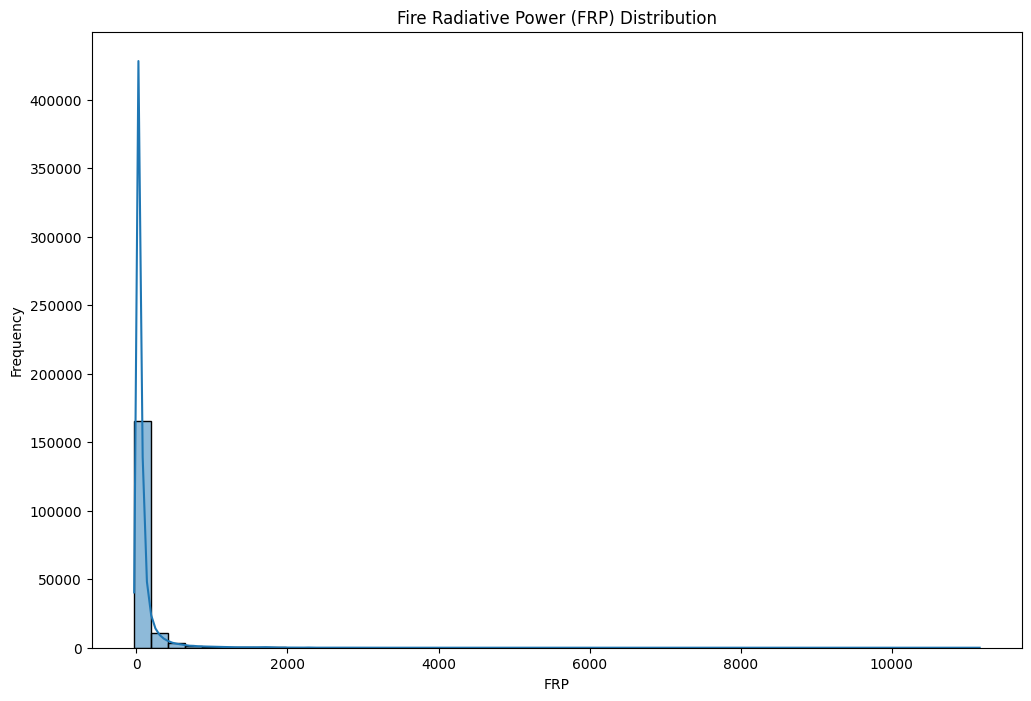

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(fire_df['frp'], bins=50, kde=True)
plt.title("Fire Radiative Power (FRP) Distribution")
plt.xlabel("FRP")
plt.ylabel("Frequency")
plt.show()

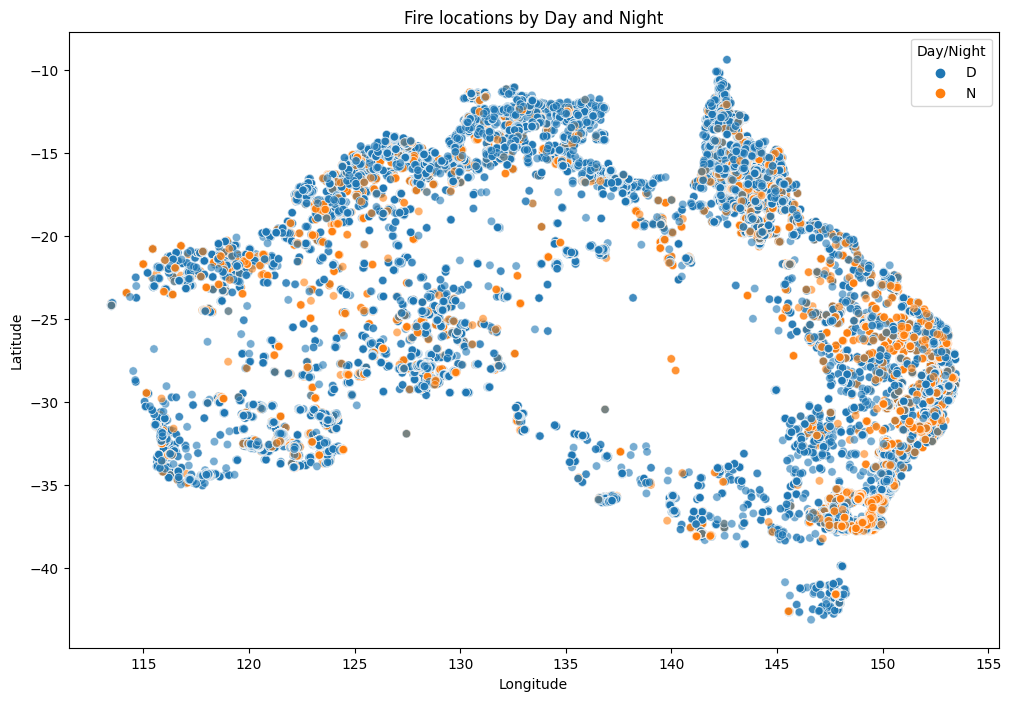

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fire_df, x='longitude', y='latitude', hue='daynight', alpha=0.6)
plt.title("Fire locations by Day and Night")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Day/Night")
plt.show()

In [18]:
fire_df['month'] = fire_df['acq_date'].dt.month
fire_df['year'] = fire_df['acq_date'].dt.year


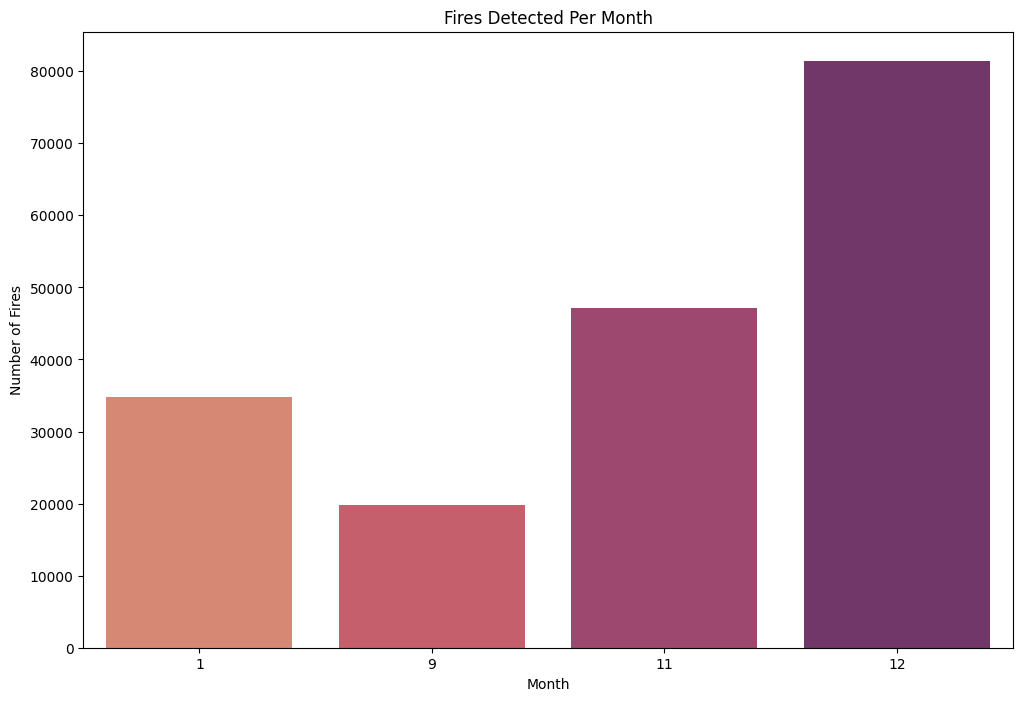

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x='month', data=fire_df, palette='flare')
plt.title("Fires Detected Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.show()

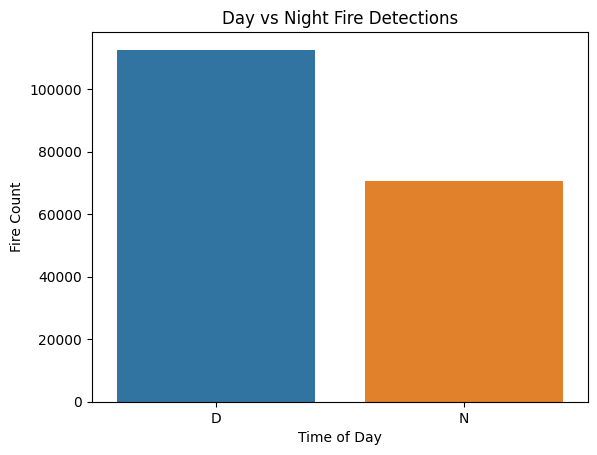

In [20]:
sns.countplot(x='daynight', data=fire_df)
plt.title("Day vs Night Fire Detections")
plt.xlabel("Time of Day")
plt.ylabel("Fire Count")
plt.show()

 GOAL: Group satellite fire detections into clusters to identify high-risk fire zones
🔹 STEP 1: Select Features for Clustering
We’ll use these features:

latitude, longitude → 🔍 fire location

brightness → 🔥 fire intensity

frp (Fire Radiative Power) → 🔥 fire strength

In [21]:
from sklearn.preprocessing import StandardScaler

features = fire_df[['latitude', 'longitude', 'brightness', 'frp']].copy()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

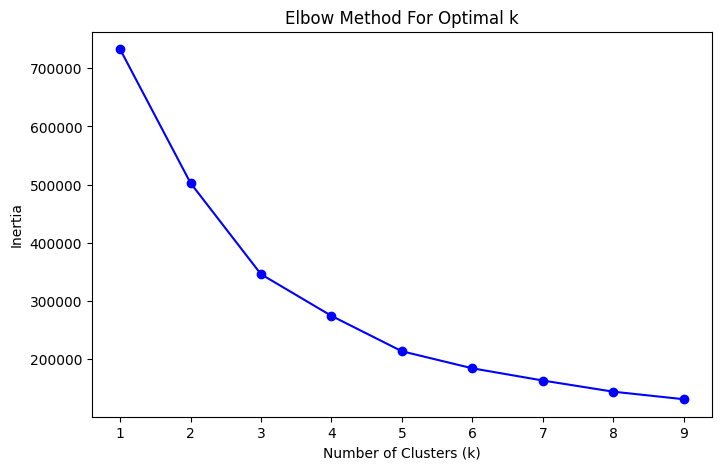

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
fire_df['cluster'] = kmeans.fit_predict(scaled_features)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


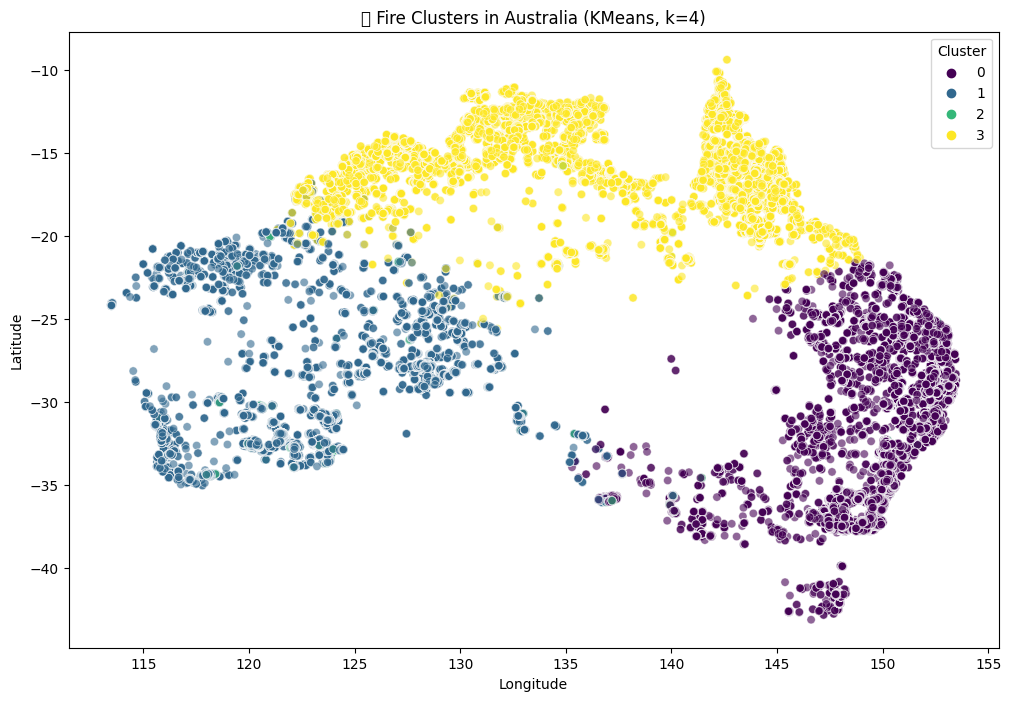

In [24]:

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='longitude', y='latitude',
    hue='cluster',
    data=fire_df,
    palette='viridis',
    alpha=0.6
)
plt.title('🔥 Fire Clusters in Australia (KMeans, k=4)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


In [25]:
cluster_summary = fire_df.groupby('cluster')[['brightness', 'frp']].mean().round(2)
cluster_summary


,brightness,frp
cluster,,
0,332.64,57.50
1,344.24,99.75
2,432.16,902.44
3,333.62,50.96


 GOAL: Classify Fire Severity from Satellite Features
We’ll:

Categorize fires by severity: Low, Medium, High

Train a Random Forest & optionally XGBoost

Add SHAP explainability for transparency in model predictions

STEP 1: Define Severity Labels (Target Variable)
We use the frp (Fire Radiative Power) column as a proxy for fire intensity.

Let’s define:

Low: FRP < 100

Medium: 100 ≤ FRP < 300

High: FRP ≥ 300

In [26]:
def frp_category(frp):
    if frp < 100:
        return 'Low'
    elif frp < 300:
        return 'Medium'
    else:
        return 'High'

fire_df['severity'] = fire_df['frp'].apply(frp_category)
fire_df['severity'].value_counts()


severity
Low       146883
Medium     25754
High       10526
Name: count, dtype: int64

 STEP 2: Select Features and Prepare Data
Let’s use these columns as features:

latitude, longitude → Location

brightness → Fire intensity

confidence, version, bright_t31, scan, track

In [27]:
features = ['latitude', 'longitude', 'brightness', 'confidence', 'bright_t31', 'scan', 'track']
X = fire_df[features]
y = fire_df['severity']


Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
le.classes_  # ['High', 'Low', 'Medium']


array(['High', 'Low', 'Medium'], dtype=object)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluation
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


🎯 Accuracy: 0.9810007370403734
📊 Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.96      0.97      2105
         Low       0.99      0.99      0.99     29377
      Medium       0.94      0.93      0.94      5151

    accuracy                           0.98     36633
   macro avg       0.97      0.96      0.96     36633
weighted avg       0.98      0.98      0.98     36633



In [31]:

fire_df.to_csv("/kaggle/working/processed_bushfire_data.csv", index=False)
